# Analyse


## importation

In [10]:
# importation of the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
#importation of the dataset
dataset = pd.read_csv('merged_data.csv')

In [12]:
dataset.head(5)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
0,Afghanistan,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000
1,Afrique du Sud,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755
2,Albanie,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485
3,Algérie,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035
4,Allemagne,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420


## Analyse dataset


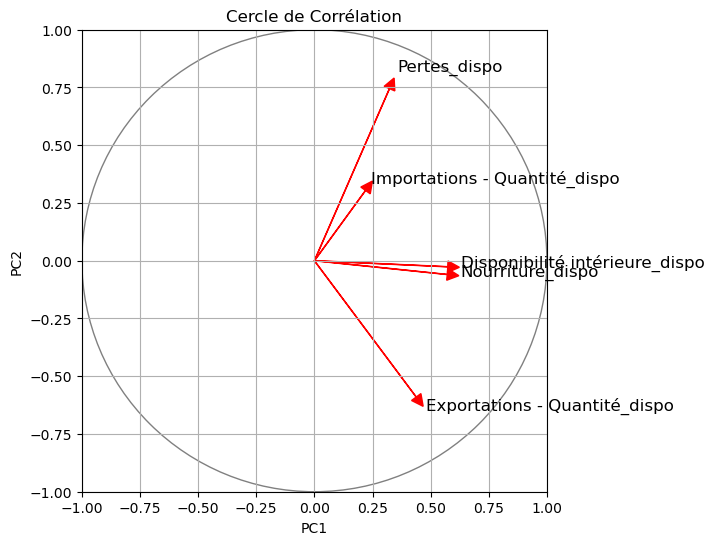

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Sélectionner les colonnes numériques
colonnes_numeriques = ["Disponibilité intérieure_dispo", "Exportations - Quantité_dispo", "Importations - Quantité_dispo", "Nourriture_dispo", "Pertes_dispo"]
data = dataset[colonnes_numeriques]

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=5)
pca.fit(data_scaled)

# Obtenir les coordonnées des variables
coords = pca.components_.T

# Créer un DataFrame pour visualisation
correlation_circle = pd.DataFrame(coords, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index=colonnes_numeriques)
plt.figure(figsize=(6,6))

# Tracer un cercle
circle = plt.Circle((0,0), 1, color='gray', fill=False)
plt.gca().add_artist(circle)

# Ajouter les vecteurs
for i in range(len(colonnes_numeriques)):
    plt.arrow(0, 0, correlation_circle.iloc[i, 0], correlation_circle.iloc[i, 1], 
              head_width=0.05, head_length=0.05, color='red')
    plt.text(correlation_circle.iloc[i, 0]*1.1, correlation_circle.iloc[i, 1]*1.1, 
             colonnes_numeriques[i], color='black', fontsize=12)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle de Corrélation")
plt.grid()
plt.show()




## Analyse ACP


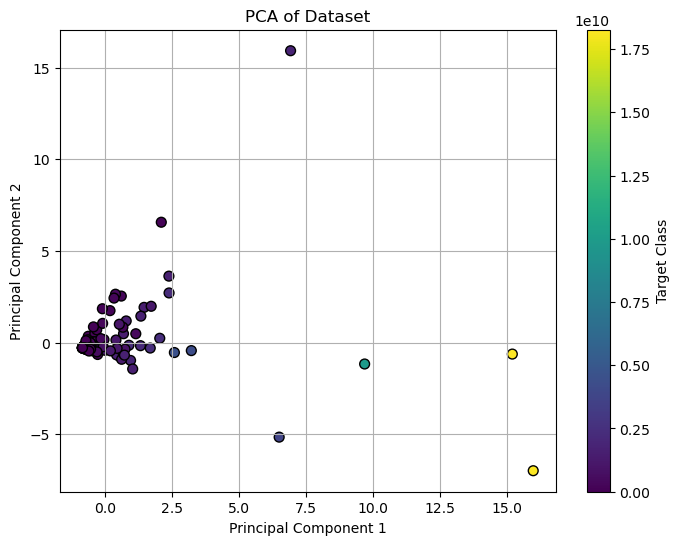

In [14]:
# Acp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, 1:11].values
# Standardization of the data
sc = StandardScaler()
X_std = sc.fit_transform(X)
# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)
# Explained variance
explained_variance = pca.explained_variance_ratio_
# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['Disponibilité intérieure_dispo'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.grid()
plt.show()
